Importing Libraries and Data Set

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv(r'E:\My ML Projects\E-Commerce\Ecommerce Customers')

In [27]:
df.head(3).T

,0,1,2
Email,mstephenson@fernandez.com,hduke@hotmail.com,pallen@yahoo.com
Address,"835 Frank Tunnel\nWrightmouth, MI 82180-9605","4547 Archer Common\nDiazchester, CA 06566-8576","24645 Valerie Unions Suite 582\nCobbborough, D..."
Avatar,Violet,DarkGreen,Bisque
Avg. Session Length,34.497268,31.926272,33.000915
Time on App,12.655651,11.109461,11.330278
Time on Website,39.577668,37.268959,37.110597
Length of Membership,4.082621,2.664034,4.104543
Yearly Amount Spent,587.951054,392.204933,487.547505


In [28]:
df.shape

(500, 8)

In [29]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email,500,500,mstephenson@fernandez.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avatar,500,138,SlateBlue,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Session Length,500.0,NaN,NaN,NaN,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,NaN,NaN,NaN,12.052488,0.994216,8.508152,11.388153,11.983231,12.75385,15.126994
Time on Website,500.0,NaN,NaN,NaN,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,NaN,NaN,NaN,3.533462,0.999278,0.269901,2.93045,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,NaN,NaN,NaN,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


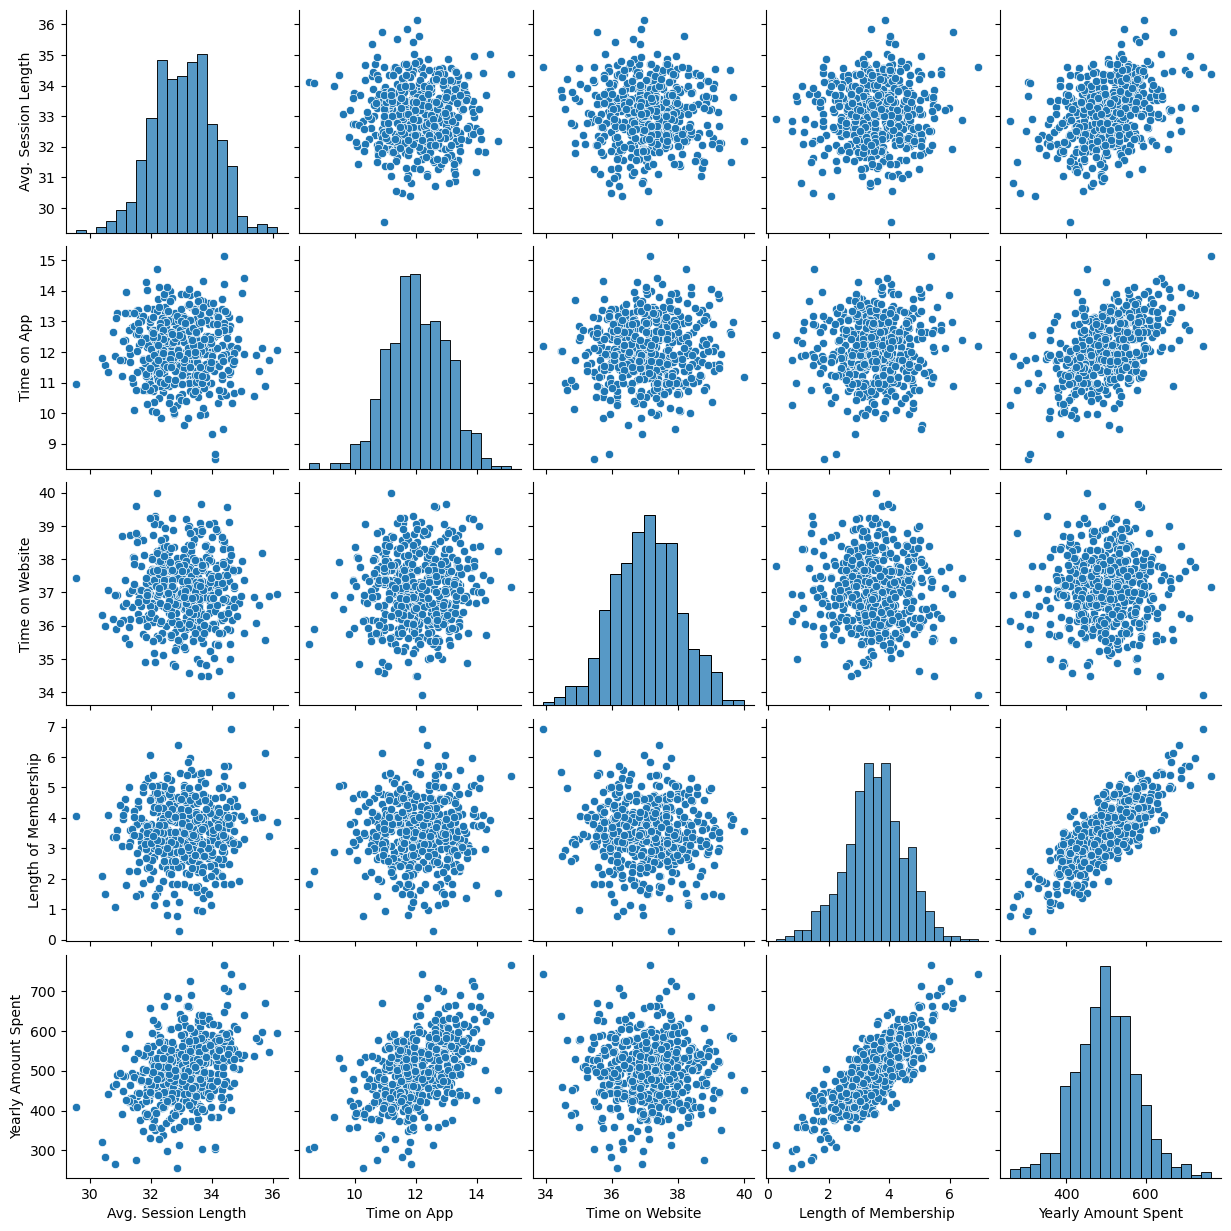

In [31]:
sns.pairplot(data=df)

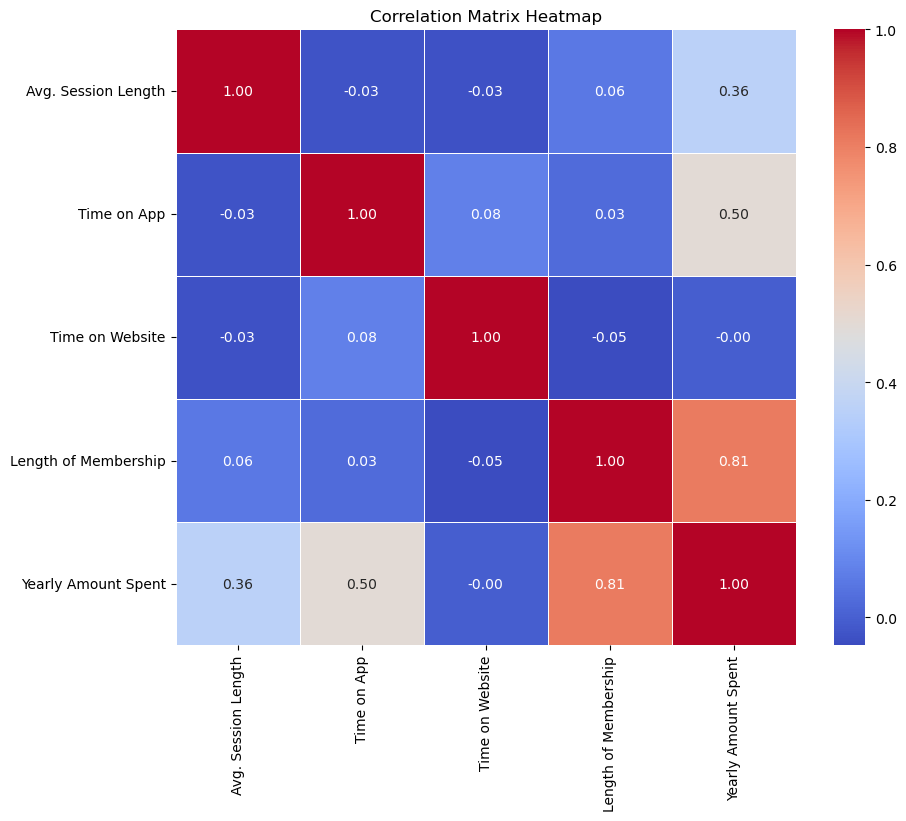

In [32]:

numerical_df = df.select_dtypes(include=['float'])

# 1. Compute the correlation matrix
corr_matrix = numerical_df.corr()

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

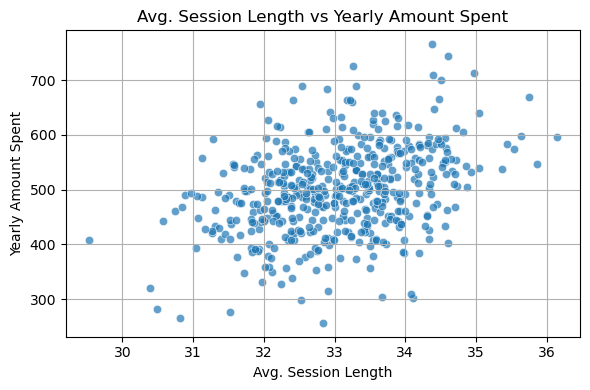

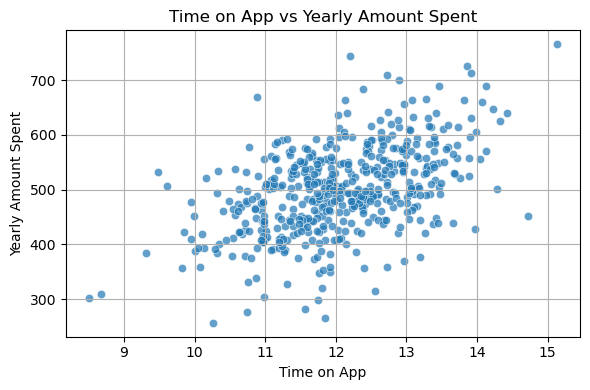

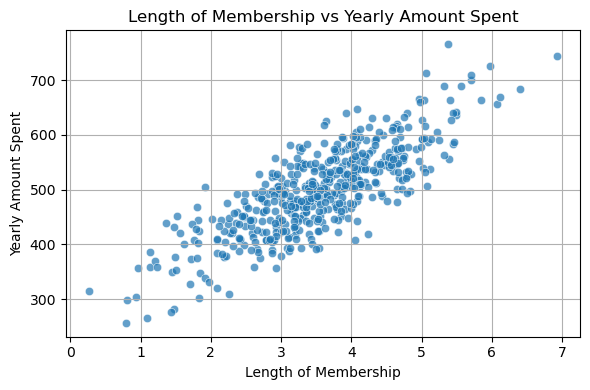

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to compare
features = ['Avg. Session Length', 'Time on App', 'Length of Membership']

# Loop through each feature and plot against the target
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Yearly Amount Spent'], alpha=0.7)
    plt.title(f'{feature} vs Yearly Amount Spent')
    plt.xlabel(feature)
    plt.ylabel('Yearly Amount Spent')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Randomly Spliting Data Set into Training and Testing.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

Training Model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [82]:
lm.fit(X_train, y_train)
lm.score(X_test, y_test)*100

98.92104861603288

In [70]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.785980
Time on App           38.877215
Length of Membership  61.479622


Predicting

In [71]:
predictions = lm.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [73]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 6.84602715809049
Mean Squared Error: 78.86825975788848
Root Mean Squared Error: 8.880780357484836


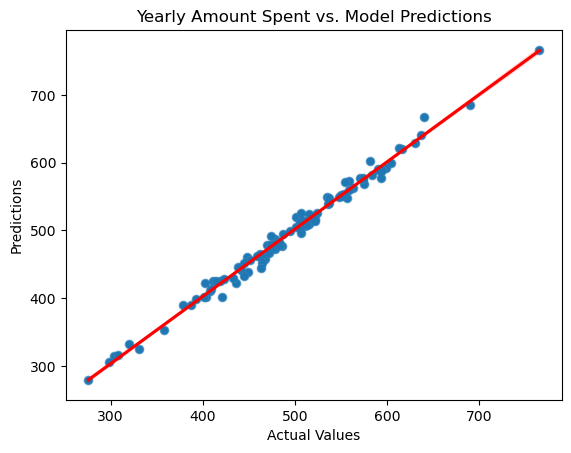

In [ ]:

# Plot dots (scatter) with regression line
sns.regplot(
    x=y_test,
    y=predictions,
    scatter=True,                   # Ensures dots are shown
    line_kws={"color": "red"},     # Makes the line red
    scatter_kws={"alpha": 0.6}     # Makes dots slightly transparent for visual clarity
)

# Label axes and title
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

# Display the plot
plt.show()


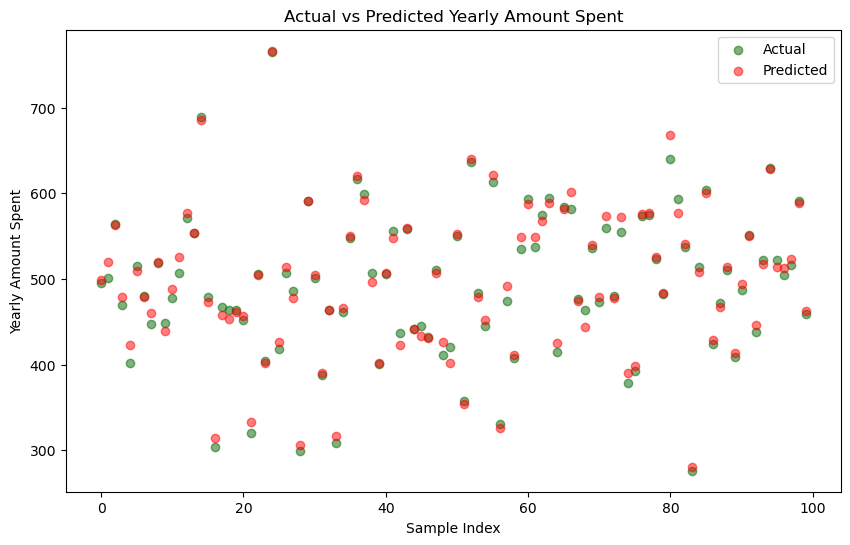

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='darkgreen', alpha=0.5, label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.5, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.legend()
plt.show()

In [76]:
residuals = y_test-predictions

In [77]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Residual': residuals
})
print(results_df.head(10))
Percent_Error = (np.abs(y_test - predictions) / y_test).mean() * 100
print("Percent Error:\n", Percent_Error)

         Actual   Predicted   Residual
304  494.687156  498.866335  -4.179179
340  501.122492  519.742856 -18.620364
47   563.672873  563.319549   0.353325
67   469.310861  479.100479  -9.789618
479  402.167122  423.158555 -20.991433
485  515.502480  509.150323   6.352157
310  479.614812  478.893058   0.721754
31   447.687907  460.400780 -12.712873
249  518.786483  519.447778  -0.661294
90   449.070319  438.791929  10.278390
Percent Error:
 1.4504766979407135


<Axes: >

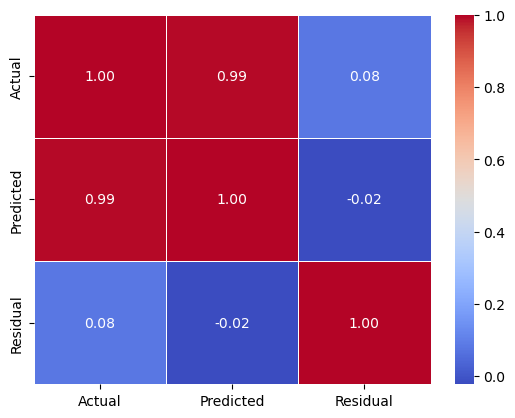

In [78]:
sns.heatmap(results_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [79]:
# Define the features in order
features = ['Avg. Session Length', 'Time on App', 'Length of Membership']

# Collect user input for each feature
user_input = []

for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)

# Convert to numpy array and reshape
input_array = np.array(user_input).reshape(1, -1)

# Predict
prediction = lm.predict(input_array)   # ← changed here from model.predict

# Output the result
print(f"\nPredicted Yearly Amount Spent: ${prediction[0]:.2f}")



Predicted Yearly Amount Spent: $2053.88


c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

print(f"Train R²: {train_score:.4f}")
print(f"Test  R²: {test_score:.4f}")


Train R²: 0.9827
Test  R²: 0.9892


In [81]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
